Define `gaussian_filter` & `find_peaks` on `ScalarField` & `VectorField`
========================================================================

In [1]:
import os
import sys

In [2]:
home = os.environ['HOME']
work_path = os.path.join(home, 'far/farMe/uFunc')
src_path = os.path.join(home, 'far/PHARE')
build_path = os.path.join(home, 'far/builds/release/ufunc')

In [3]:
sys.path.append(os.path.join(src_path, "pyphare"))

In [4]:
import subprocess
import pyphare
import matplotlib.pyplot as plt
from pyphare.pharesee.run import Run
from pyphare.core.operators import dot, cross, sqrt, modulus, grad
from pyphare.core.ufuncs import gFilt, gF, peakIds
import numpy as np

In [5]:
Te = 0.2

In [6]:
run_path = os.path.join(work_path, 'wp_{0}'.format(Te))

In [7]:
if os.path.isdir(run_path):
    files = os.listdir(run_path)
else:
    files = []

In [8]:
if 'PYTHONPATH' in os.environ:
    os.environ['PYTHONPATH'] += os.pathsep + os.path.join(src_path, "pyphare")
else:
    os.environ['PYTHONPATH'] = os.pathsep + os.path.join(src_path, "pyphare")
os.environ['PYTHONPATH'] += os.pathsep + build_path

In [9]:
if 'ions_charge_density.h5' not in files :
    os.chdir(work_path)
    # subprocess.call(['/usr/bin/python3', work_path+'/wp.py', str(Te)])
    # subprocess.call(['mpirun', '-n', '4', '/usr/bin/python3', work_path+'/wp.py', str(Te)])
    subprocess.run(['mpirun', '-n', '4', '/usr/bin/python3', work_path+'/wp.py', str(Te)], env=os.environ)
    # essayer avec "run" au lieu de "call", qui accepte a priori env=os.environ

In [10]:
run  = Run(run_path)
time = 60.0

# Operation on `ScalarField`

In [11]:
N = run.GetNi(time)
type(N)

pyphare.pharesee.hierarchy.scalarfield.ScalarField

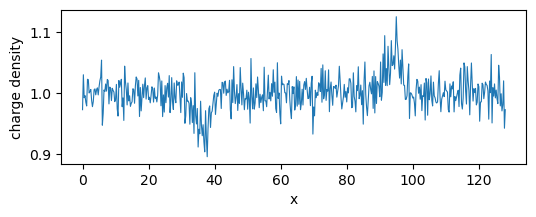

In [12]:
fig, ax = plt.subplots(figsize=(6,2))

N.plot(qty='value', ax=ax, ls='solid', lw=0.8, color='tab:blue', ylabel='charge density')

In [13]:
# n = gFilt(N, sigma=6)

In [14]:
n = gF(N, sigma=6)

In [15]:
pks_plus = peakIds(n, height=1.05)
pks_minus = peakIds(-n, names=['value',], height=-0.95)

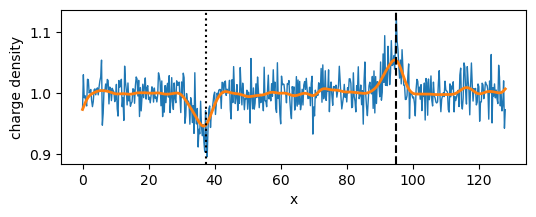

In [16]:
fig, ax = plt.subplots(figsize=(6,2))

N.plot(qty='value', ax=ax, ls='solid', lw=1.0, color='tab:blue', ylabel='charge density')
n.plot(qty='value', ax=ax, ls='solid', lw=2.0, color='tab:orange', ylabel='charge density')
for p in pks_plus:
    ax.axvline(x=p, color='black', linestyle='dashed')
for p in pks_minus:
    ax.axvline(x=p, color='black', linestyle='dotted')

# Operation on `VectorField`

In [17]:
V = run.GetVi(time)

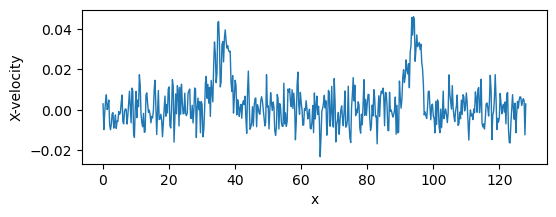

In [18]:
fig, ax = plt.subplots(figsize=(6,2))

V.plot(qty='x', ax=ax, ls='solid', lw=1.0, color='tab:blue', ylabel='X-velocity')

In [19]:
# v = gFilt(V, sigma=6)

In [20]:
v = gF(V, sigma=6)

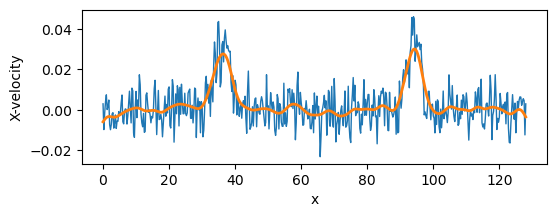

In [21]:
fig, ax = plt.subplots(figsize=(6,2))

V.plot(qty='x', ax=ax, ls='solid', lw=1.0, color='tab:blue', ylabel='X-velocity')
v.plot(qty='x', ax=ax, ls='solid', lw=2.0, color='tab:orange', ylabel='X-velocity')

In [22]:
pks = peakIds(v, height=0.02)

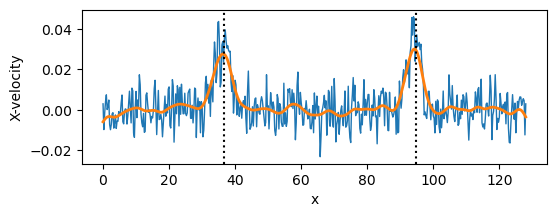

In [23]:
fig, ax = plt.subplots(figsize=(6,2))

V.plot(qty='x', ax=ax, ls='solid', lw=1.0, color='tab:blue', ylabel='X-velocity')
v.plot(qty='x', ax=ax, ls='solid', lw=2.0, color='tab:orange', ylabel='X-velocity')
for p in pks:
    ax.axvline(x=p, color='black', linestyle='dotted')

# Get an interpolator on a `ScalarField`

In [24]:
inter = N.interpol(time)

In [25]:
fn, x_ = inter['value']
x = np.asarray(x_[0])
x = np.arange(0, 150)

Text(0, 0.5, 'charge density')

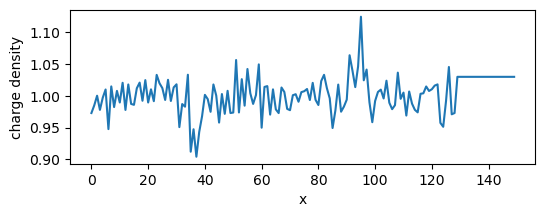

In [26]:
fig, ax = plt.subplots(figsize=(6,2))

ax.plot(x, fn(x))
ax.set_xlabel('x')
ax.set_ylabel('charge density')

# Get an interpolator on a `VectorField`

In [27]:
inter = V.interpol(time)

In [28]:
fvx, x_ = inter['x']
x = np.asarray(x_[0])

Text(0, 0.5, 'X-velocity')

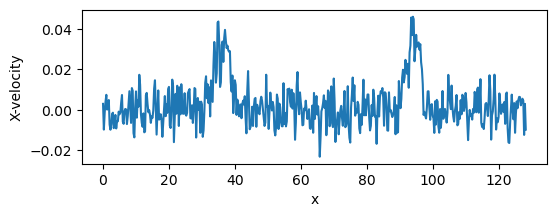

In [29]:
fig, ax = plt.subplots(figsize=(6,2))

ax.plot(x, fvx(x))
ax.set_xlabel('x')
ax.set_ylabel('X-velocity')

In [30]:
for ilvl, lvl in N.levels(time).items():
    for patch in lvl.patches:
        names = list(patch.patch_datas.keys())
        print('names      : {}'.format(names))
        print("id         : {}".format(patch.id))
        print("box        : {}".format(patch.patch_datas[list(patch.patch_datas.keys())[0]].box))
        print(dir(patch.patch_datas[list(patch.patch_datas.keys())[0]]))
        for name in names:
            pdata = patch.patch_datas[name]
            # print("name       : {}".format(name))
            print("size [{}]  : {}   -   {}".format(name, pdata.size, pdata.centerings))
        print(" --- ")
        break

names      : ['value']
id         : p0#0
box        : Box([0],[511])
['__class__', '__deepcopy__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__firstlineno__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setitem__', '__sizeof__', '__static_attributes__', '__str__', '__subclasshook__', '__weakref__', '_x', '_y', '_z', 'box', 'centerings', 'compare', 'dataset', 'dl', 'field_name', 'ghost_box', 'ghosts_nbr', 'layout', 'meshgrid', 'name', 'ndim', 'offset', 'origin', 'primal_directions', 'quantity', 'select', 'size', 'x', 'y', 'z']
size [value]  : [517]   -   ['primal']
 --- 
